<a href="https://colab.research.google.com/github/chaeyh4/MotionSense/blob/main/Genie_Resample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import signal

In [ ]:
#Google Drive 연결
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
file_path = input()

/content/gdrive/MyDrive/genie/genie23_01/194956.csv


In [ ]:
data = pd.read_csv(file_path)
data

,Unnamed: 0,unixtime,utctime,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,0,1678272596426,2023-03-08 10:49:56.426,96,180,16536,-12,86,135
1,1,1678272596436,2023-03-08 10:49:56.436,84,224,16508,4,85,127
2,2,1678272596446,2023-03-08 10:49:56.446,68,180,16516,-33,86,161
3,3,1678272596457,2023-03-08 10:49:56.457,136,204,16500,-27,77,143
4,4,1678272596467,2023-03-08 10:49:56.467,-4,180,16476,-17,121,151
...,...,...,...,...,...,...,...,...,...
34369,34369,1678272955047,2023-03-08 10:55:55.047,352,4,16492,9,73,168
34370,34370,1678272955055,2023-03-08 10:55:55.055,444,32,16656,-34,63,176
34371,34371,1678272955066,2023-03-08 10:55:55.066,400,56,16392,6,92,143
34372,34372,1678272955076,2023-03-08 10:55:55.076,372,52,16508,-3,63,182


#datetime 변환

In [ ]:
data.dtypes

Unnamed: 0     int64
unixtime       int64
utctime       object
acc_x          int64
acc_y          int64
acc_z          int64
gyro_x         int64
gyro_y         int64
gyro_z         int64
dtype: object

In [ ]:
import datetime

In [ ]:
for i in range(len(data['utctime'])):
  data.loc[i,'utctime'] = datetime.datetime.strptime(data.loc[i,'utctime'], '%Y-%m-%d %H:%M:%S.%f')

In [ ]:
data['utctime'] = pd.to_datetime(data['utctime'])

In [ ]:
data.dtypes

Unnamed: 0             int64
unixtime               int64
utctime       datetime64[ns]
acc_x                  int64
acc_y                  int64
acc_z                  int64
gyro_x                 int64
gyro_y                 int64
gyro_z                 int64
dtype: object

In [ ]:
data

,Unnamed: 0,unixtime,utctime,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,0,1678272596426,2023-03-08 10:49:56.426,96,180,16536,-12,86,135
1,1,1678272596436,2023-03-08 10:49:56.436,84,224,16508,4,85,127
2,2,1678272596446,2023-03-08 10:49:56.446,68,180,16516,-33,86,161
3,3,1678272596457,2023-03-08 10:49:56.457,136,204,16500,-27,77,143
4,4,1678272596467,2023-03-08 10:49:56.467,-4,180,16476,-17,121,151
...,...,...,...,...,...,...,...,...,...
34369,34369,1678272955047,2023-03-08 10:55:55.047,352,4,16492,9,73,168
34370,34370,1678272955055,2023-03-08 10:55:55.055,444,32,16656,-34,63,176
34371,34371,1678272955066,2023-03-08 10:55:55.066,400,56,16392,6,92,143
34372,34372,1678272955076,2023-03-08 10:55:55.076,372,52,16508,-3,63,182


#Pandas 이용


In [ ]:
data_acc_x = data['acc_x'].tolist()
data_acc_y = data['acc_y'].tolist()
data_acc_z = data['acc_z'].tolist()

In [ ]:
data_gyro_x = data['gyro_x'].tolist()
data_gyro_y = data['gyro_y'].tolist()
data_gyro_z = data['gyro_z'].tolist()

In [ ]:
data_series_name = [data_acc_x,data_acc_y,data_acc_z,data_gyro_x,data_gyro_y,data_gyro_z]

In [ ]:
data_series = []
for i in data_series_name:
  i = pd.Series(i, index=data['utctime'])
  data_series.append(i)

In [ ]:
data_series_resample = []
for i in data_series:
  data_series_resample.append(i.resample('10ms').mean())

In [ ]:
data_series_interpolate = []
for i in data_series_resample:
  data_series_interpolate.append(i.interpolate(method='values'))

In [ ]:
acc_x = data_series_interpolate[0].to_frame()
acc_y = data_series_interpolate[1].to_frame()
acc_z = data_series_interpolate[2].to_frame()
gyro_x = data_series_interpolate[3].to_frame()
gyro_y = data_series_interpolate[4].to_frame()
gyro_z = data_series_interpolate[5].to_frame()

In [ ]:
data_interpolate = pd.concat([acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z],axis=1)
data_interpolate.columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [ ]:
data_interpolate

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
utctime,,,,,,
2023-03-08 10:49:56.420,96.0,180.0,16536.0,-12.0,86.0,135.0
2023-03-08 10:49:56.430,84.0,224.0,16508.0,4.0,85.0,127.0
2023-03-08 10:49:56.440,68.0,180.0,16516.0,-33.0,86.0,161.0
2023-03-08 10:49:56.450,136.0,204.0,16500.0,-27.0,77.0,143.0
2023-03-08 10:49:56.460,-4.0,180.0,16476.0,-17.0,121.0,151.0
...,...,...,...,...,...,...
2023-03-08 10:55:55.040,352.0,4.0,16492.0,9.0,73.0,168.0
2023-03-08 10:55:55.050,444.0,32.0,16656.0,-34.0,63.0,176.0
2023-03-08 10:55:55.060,400.0,56.0,16392.0,6.0,92.0,143.0


In [ ]:
data[15:24]

,Unnamed: 0,unixtime,utctime,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
15,15,1678272596580,2023-03-08 10:49:56.580,52,196,16432,10,63,144
16,16,1678272596590,2023-03-08 10:49:56.590,48,176,16448,-8,84,142
17,17,1678272596600,2023-03-08 10:49:56.600,20,184,16544,-21,78,170
18,18,1678272596610,2023-03-08 10:49:56.610,12,180,16532,-13,82,187
19,19,1678272596619,2023-03-08 10:49:56.619,68,176,16664,-27,75,160
20,20,1678272596629,2023-03-08 10:49:56.629,72,240,16648,-21,84,142
21,21,1678272596639,2023-03-08 10:49:56.639,56,236,16516,-7,78,143
22,22,1678272596649,2023-03-08 10:49:56.649,156,184,16600,25,125,156
23,23,1678272596659,2023-03-08 10:49:56.659,60,200,16512,-22,65,152


In [ ]:
import matplotlib.pyplot as plt

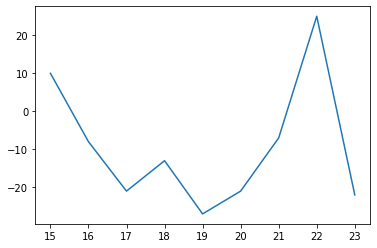

In [ ]:
plt.plot(data['gyro_x'][15:24])

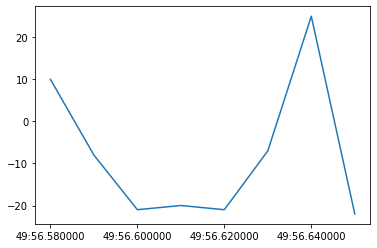

In [ ]:
plt.plot(data_interpolate['gyro_x'][16:24])

#Scipy 이용

In [ ]:
#10.5265ms 목표 시간

In [ ]:
sum_diff = 0
for i in range(len(data['unixtime'])-1):
  diff = data.loc[i+1,'unixtime']-data.loc[i,'unixtime']
  sum_diff += diff
mean_diff = sum_diff/(len(data['unixtime']-1))

In [ ]:
mean_diff

10.434048990516088

In [ ]:
sum_diff/29999

11.95573185772859

In [ ]:
start = data.loc[0,'unixtime']
end = data.loc[len(data['unixtime'])-1,'unixtime']
total_num = (end-start)/10.5265

In [ ]:
total_num

34072.10373818458

In [ ]:
data

,Unnamed: 0,unixtime,utctime,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,0,1678272596426,2023-03-08 10:49:56.426,96,180,16536,-12,86,135
1,1,1678272596436,2023-03-08 10:49:56.436,84,224,16508,4,85,127
2,2,1678272596446,2023-03-08 10:49:56.446,68,180,16516,-33,86,161
3,3,1678272596457,2023-03-08 10:49:56.457,136,204,16500,-27,77,143
4,4,1678272596467,2023-03-08 10:49:56.467,-4,180,16476,-17,121,151
...,...,...,...,...,...,...,...,...,...
34369,34369,1678272955047,2023-03-08 10:55:55.047,352,4,16492,9,73,168
34370,34370,1678272955055,2023-03-08 10:55:55.055,444,32,16656,-34,63,176
34371,34371,1678272955066,2023-03-08 10:55:55.066,400,56,16392,6,92,143
34372,34372,1678272955076,2023-03-08 10:55:55.076,372,52,16508,-3,63,182


In [ ]:
resample_data= signal.resample(data.iloc[:,3:], 30000)

In [ ]:
resample_data = pd.DataFrame(resample_data)

In [ ]:
resample_data.columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [ ]:
resample_data

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,103.191100,185.759461,16520.350084,-4.849599,81.174901,129.279939
1,75.789781,210.082621,16515.223765,-5.026366,91.487207,135.470149
2,93.417074,192.166236,16515.925737,-32.671063,74.636591,157.507862
3,90.000185,187.520730,16472.461872,-24.499988,100.490800,143.130685
4,-3.519464,212.850883,16570.658251,-0.448390,110.409948,151.795738
...,...,...,...,...,...,...
29995,399.467576,77.204389,16415.665368,-16.093541,71.917307,144.146258
29996,378.494029,5.572345,16611.724789,-8.916430,60.977919,183.615894
29997,445.419466,49.003609,16507.951908,-18.907579,85.075051,149.180636
29998,360.841872,57.899485,16435.770394,9.599456,71.416889,171.256758


In [ ]:
resample_gyro_x = signal.resample(data.iloc[:,6], 30000)

In [ ]:
#resample_time = signal.resample(data.iloc[:, 2], 30000)

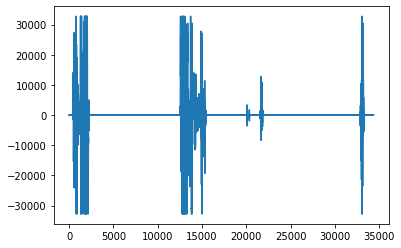

In [ ]:
plt.plot(data['gyro_x'])

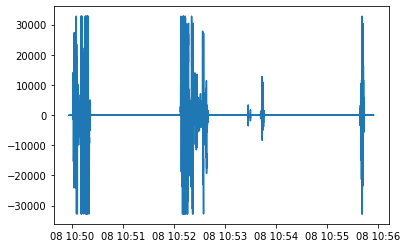

In [ ]:
plt.plot(data_interpolate['gyro_x'])

#Visualization

##acc 데이터 시각화

In [ ]:
data

,Unnamed: 0,unixtime,utctime,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,0,1678272596426,2023-03-08 10:49:56.426,96,180,16536,-12,86,135
1,1,1678272596436,2023-03-08 10:49:56.436,84,224,16508,4,85,127
2,2,1678272596446,2023-03-08 10:49:56.446,68,180,16516,-33,86,161
3,3,1678272596457,2023-03-08 10:49:56.457,136,204,16500,-27,77,143
4,4,1678272596467,2023-03-08 10:49:56.467,-4,180,16476,-17,121,151
...,...,...,...,...,...,...,...,...,...
34369,34369,1678272955047,2023-03-08 10:55:55.047,352,4,16492,9,73,168
34370,34370,1678272955055,2023-03-08 10:55:55.055,444,32,16656,-34,63,176
34371,34371,1678272955066,2023-03-08 10:55:55.066,400,56,16392,6,92,143
34372,34372,1678272955076,2023-03-08 10:55:55.076,372,52,16508,-3,63,182


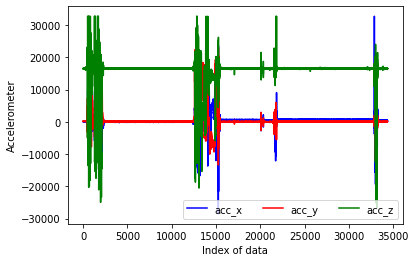

In [ ]:
plt.plot(data['acc_x'],label='acc_x', color='b') #, marker='o'
plt.plot(data['acc_y'],label='acc_y', color='r')
plt.plot(data['acc_z'],label='acc_z', color='g')
plt.xlabel('Index of data')
plt.ylabel('Accelerometer')
plt.legend(loc='lower right', ncol=3, fontsize = 10)

In [ ]:
data_interpolate

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
utctime,,,,,,
2023-03-08 10:49:56.420,96.0,180.0,16536.0,-12.0,86.0,135.0
2023-03-08 10:49:56.430,84.0,224.0,16508.0,4.0,85.0,127.0
2023-03-08 10:49:56.440,68.0,180.0,16516.0,-33.0,86.0,161.0
2023-03-08 10:49:56.450,136.0,204.0,16500.0,-27.0,77.0,143.0
2023-03-08 10:49:56.460,-4.0,180.0,16476.0,-17.0,121.0,151.0
...,...,...,...,...,...,...
2023-03-08 10:55:55.040,352.0,4.0,16492.0,9.0,73.0,168.0
2023-03-08 10:55:55.050,444.0,32.0,16656.0,-34.0,63.0,176.0
2023-03-08 10:55:55.060,400.0,56.0,16392.0,6.0,92.0,143.0


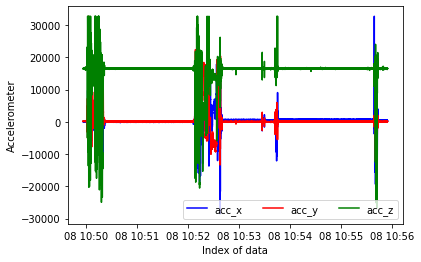

In [ ]:
plt.plot(data_interpolate['acc_x'],label='acc_x', color='b')
plt.plot(data_interpolate['acc_y'],label='acc_y', color='r')
plt.plot(data_interpolate['acc_z'],label='acc_z', color='g')
plt.xlabel('Index of data')
plt.ylabel('Accelerometer')
plt.legend(loc='lower right', ncol=3,fontsize = 10)

In [ ]:
resample_data

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,103.191100,185.759461,16520.350084,-4.849599,81.174901,129.279939
1,75.789781,210.082621,16515.223765,-5.026366,91.487207,135.470149
2,93.417074,192.166236,16515.925737,-32.671063,74.636591,157.507862
3,90.000185,187.520730,16472.461872,-24.499988,100.490800,143.130685
4,-3.519464,212.850883,16570.658251,-0.448390,110.409948,151.795738
...,...,...,...,...,...,...
29995,399.467576,77.204389,16415.665368,-16.093541,71.917307,144.146258
29996,378.494029,5.572345,16611.724789,-8.916430,60.977919,183.615894
29997,445.419466,49.003609,16507.951908,-18.907579,85.075051,149.180636
29998,360.841872,57.899485,16435.770394,9.599456,71.416889,171.256758


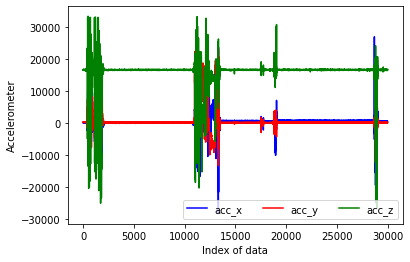

In [ ]:
plt.plot(resample_data['acc_x'],label='acc_x', color='b')
plt.plot(resample_data['acc_y'],label='acc_y', color='r')
plt.plot(resample_data['acc_z'],label='acc_z', color='g')
plt.xlabel('Index of data')
plt.ylabel('Accelerometer')
plt.legend(loc='lower right', ncol=3,fontsize = 10)

##gyro 데이터 시각화

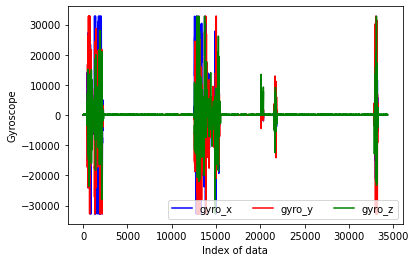

In [ ]:
plt.plot(data['gyro_x'],label='gyro_x', color='b') #, marker='o'
plt.plot(data['gyro_y'],label='gyro_y', color='r')
plt.plot(data['gyro_z'],label='gyro_z', color='g')
plt.xlabel('Index of data')
plt.ylabel('Gyroscope')
plt.legend(loc='lower right', ncol=3, fontsize = 10)

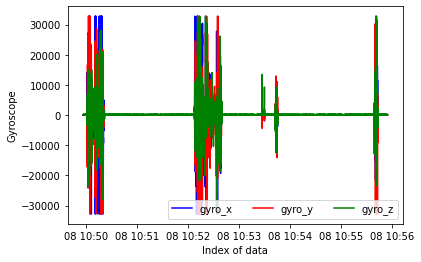

In [ ]:
plt.plot(data_interpolate['gyro_x'],label='gyro_x', color='b')
plt.plot(data_interpolate['gyro_y'],label='gyro_y', color='r')
plt.plot(data_interpolate['gyro_z'],label='gyro_z', color='g')
plt.xlabel('Index of data')
plt.ylabel('Gyroscope')
plt.legend(loc='lower right', ncol=3,fontsize = 10)

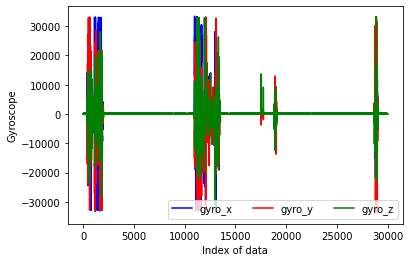

In [ ]:
plt.plot(resample_data['gyro_x'],label='gyro_x', color='b')
plt.plot(resample_data['gyro_y'],label='gyro_y', color='r')
plt.plot(resample_data['gyro_z'],label='gyro_z', color='g')
plt.xlabel('Index of data')
plt.ylabel('Gyroscope')
plt.legend(loc='lower right', ncol=3,fontsize = 10)

In [ ]:
resample_data_num = signal.resample(data.iloc[:,3:], 5000)
resample_data_num = pd.DataFrame(resample_data_num)
resample_data_num.columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

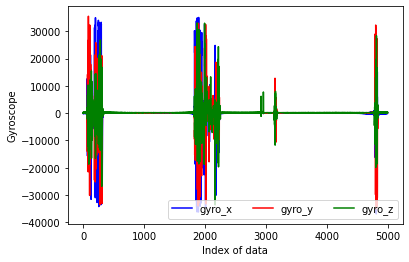

In [ ]:
plt.plot(resample_data_num['gyro_x'],label='gyro_x', color='b')
plt.plot(resample_data_num['gyro_y'],label='gyro_y', color='r')
plt.plot(resample_data_num['gyro_z'],label='gyro_z', color='g')
plt.xlabel('Index of data')
plt.ylabel('Gyroscope')
plt.legend(loc='lower right', ncol=3,fontsize = 10)

#데이터 세분화 후 sampling

In [ ]:
data_200 = data[800:1000] #약 2초간의 데이터

In [ ]:
data_200

,Unnamed: 0,unixtime,utctime,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
800,800,1678272605001,2023-03-08 10:50:05.001,-4036,9000,11216,-23467,19743,-6376
801,801,1678272605011,2023-03-08 10:50:05.011,-4544,10264,12416,-23468,18272,-5140
802,802,1678272605024,2023-03-08 10:50:05.024,-4872,11092,14416,-25729,14952,-2263
803,803,1678272605034,2023-03-08 10:50:05.034,-4288,11816,17824,-28895,9439,1770
804,804,1678272605044,2023-03-08 10:50:05.044,-2292,12488,22168,-32253,2605,6281
...,...,...,...,...,...,...,...,...,...
995,995,1678272607168,2023-03-08 10:50:07.168,-864,8112,12704,-6886,5355,9362
996,996,1678272607178,2023-03-08 10:50:07.178,64,6492,14116,-7295,3119,9192
997,997,1678272607190,2023-03-08 10:50:07.190,936,5308,15412,-7343,1039,9055
998,998,1678272607201,2023-03-08 10:50:07.201,1980,4424,16436,-7108,-344,8433


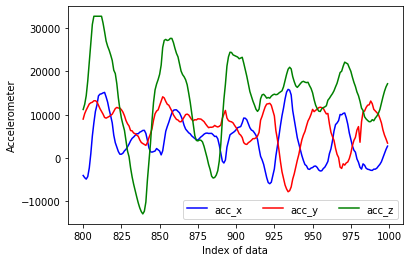

In [ ]:
plt.plot(data_200['acc_x'],label='acc_x', color='b') #, marker='o'
plt.plot(data_200['acc_y'],label='acc_y', color='r')
plt.plot(data_200['acc_z'],label='acc_z', color='g')
plt.xlabel('Index of data')
plt.ylabel('Accelerometer')
plt.legend(loc='lower right', ncol=3, fontsize = 10)

In [ ]:
resample_data_200= signal.resample(data_200.iloc[:,3:], 100)
resample_data_200 = pd.DataFrame(resample_data_200)
resample_data_200.columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

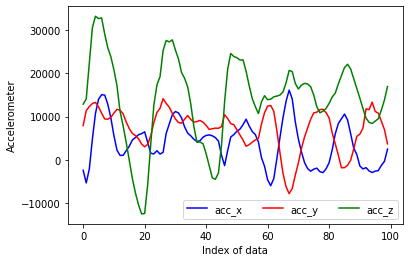

In [ ]:
plt.plot(resample_data_200['acc_x'],label='acc_x', color='b') #, marker='o'
plt.plot(resample_data_200['acc_y'],label='acc_y', color='r')
plt.plot(resample_data_200['acc_z'],label='acc_z', color='g')
plt.xlabel('Index of data')
plt.ylabel('Accelerometer')
plt.legend(loc='lower right', ncol=3, fontsize = 10)

In [ ]:
data_200 = data[0:200] #약 2초간의 데이터

In [ ]:
resample_data_200= signal.resample(data_200.iloc[:,3:], 100)
resample_data_200 = pd.DataFrame(resample_data_200)
resample_data_200.columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

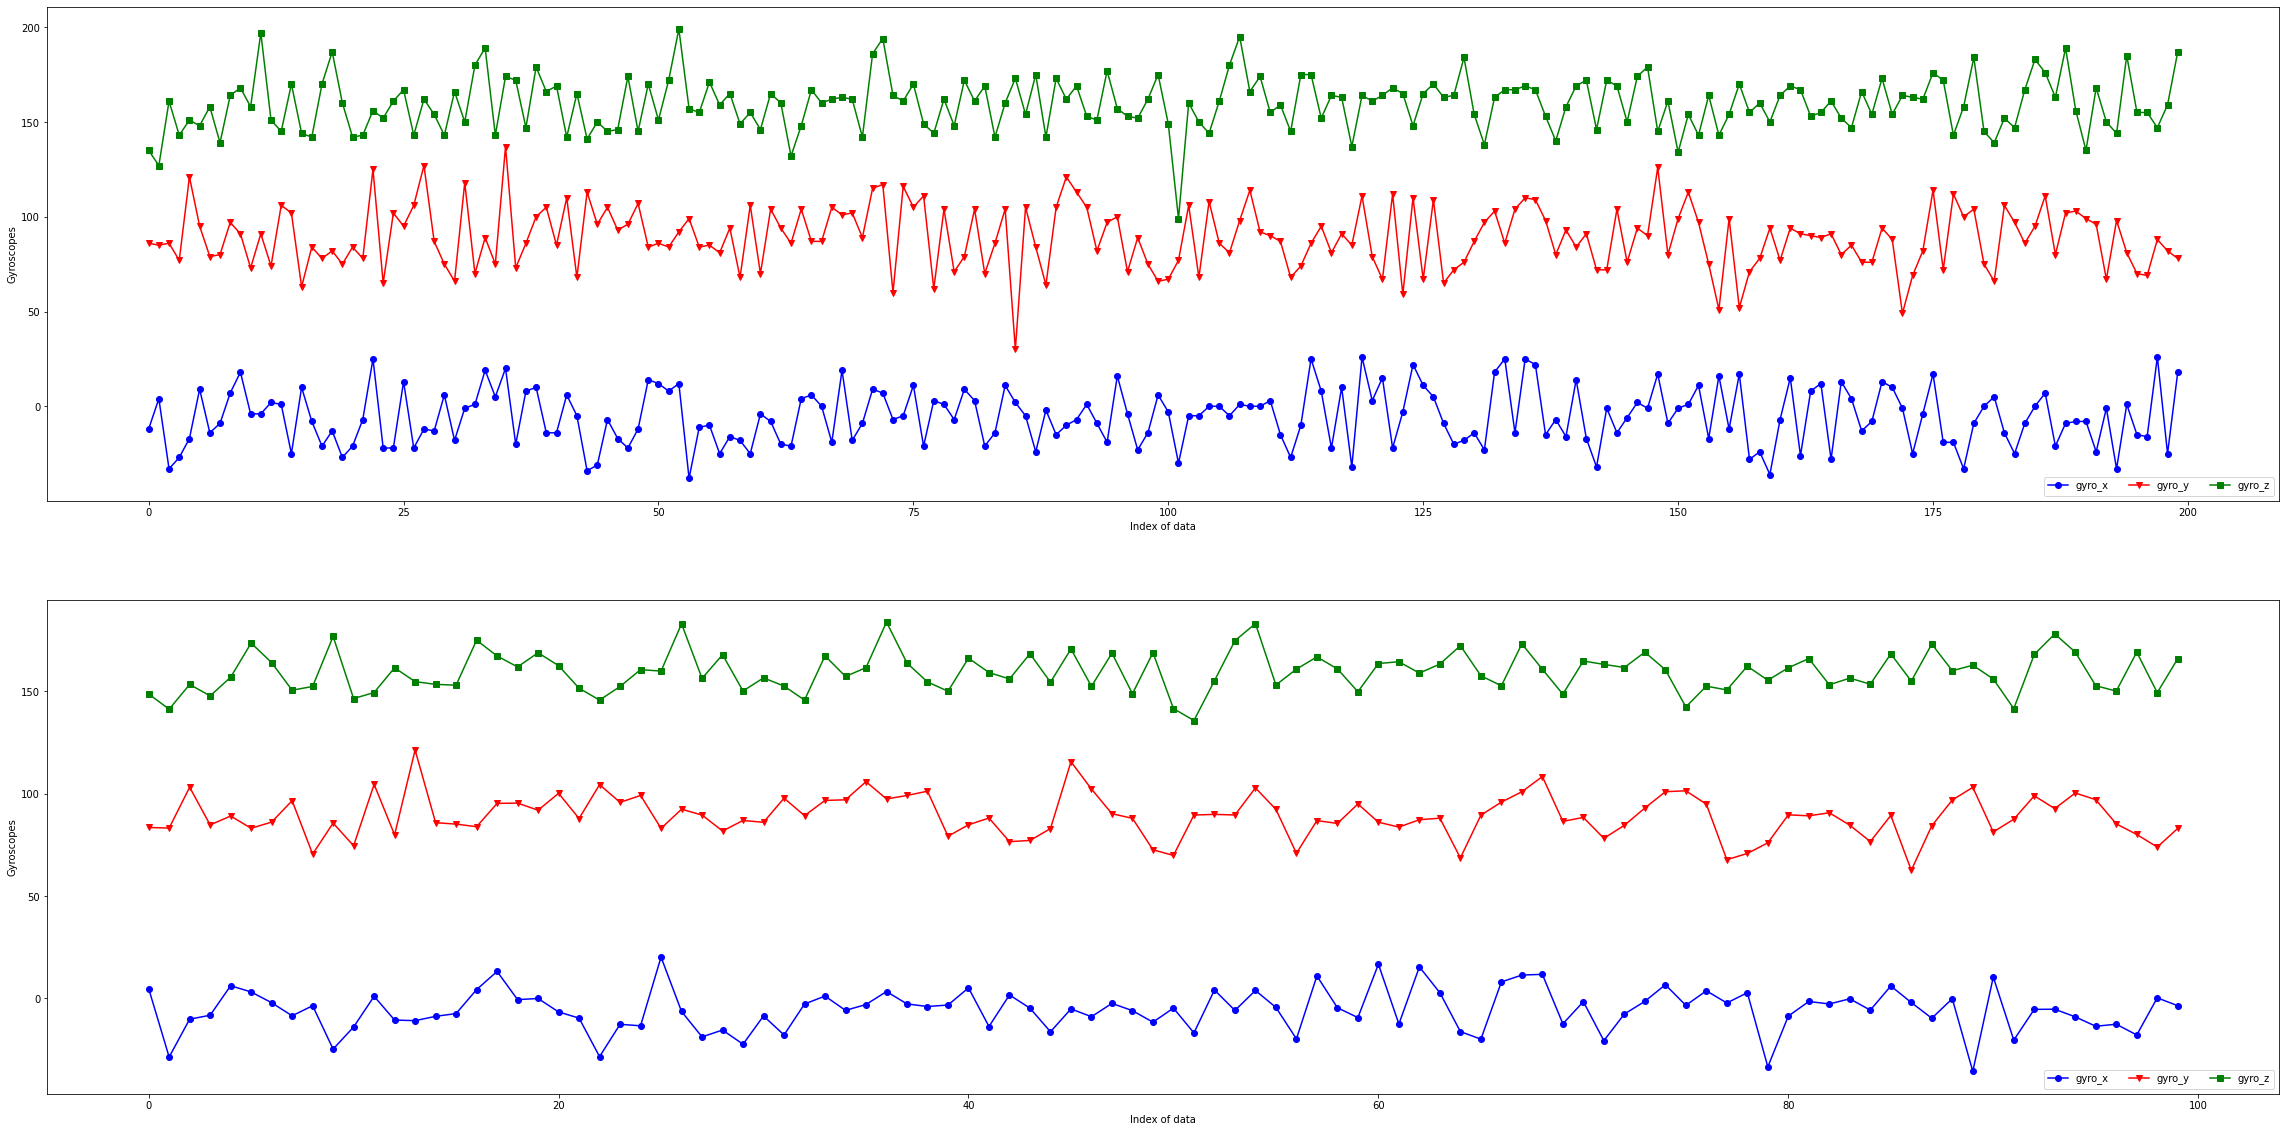

In [ ]:
plt.figure(figsize=(40,20))

plt.subplot(2,1,1)
plt.plot(data_200['gyro_x'],label='gyro_x', color='b',marker='o')
plt.plot(data_200['gyro_y'],label='gyro_y', color='r',marker='v')
plt.plot(data_200['gyro_z'],label='gyro_z', color='g',marker='s')
plt.xlabel('Index of data')
plt.ylabel('Gyroscopes')
plt.legend(loc='lower right', ncol=3, fontsize = 10)

plt.subplot(2,1,2)
plt.plot(resample_data_200['gyro_x'],label='gyro_x', color='b', marker='o') 
plt.plot(resample_data_200['gyro_y'],label='gyro_y', color='r', marker='v')
plt.plot(resample_data_200['gyro_z'],label='gyro_z', color='g', marker='s')
plt.xlabel('Index of data')
plt.ylabel('Gyroscopes')
plt.legend(loc='lower right', ncol=3, fontsize = 10)


In [ ]:
start = data.loc[0,'unixtime']
end = data.loc[199,'unixtime']
total_time = (end-start)
total_time

2042

In [ ]:
total_time/100

20.42